In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Ecuación de Burgers 2D

En el caso de la convección no lineal en dos dimensiones tenemos la siguiente ecuación

$$\frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\vec{\nabla}\right)\vec{u} = \nu \Delta \vec{u}$$

Donde $\Delta$ es el operador Laplaciano.

Escrita de forma explícitamente en componentes tenemos

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = \nu \left( \frac{\partial^2 u}{\partial x^2}+ \frac{\partial^2 u}{\partial y^2}\right)$$

$$\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = \nu \left( \frac{\partial^2 v}{\partial x^2}+ \frac{\partial^2 v}{\partial y^2}\right)$$

Discretizando estas ecuaciones tenemos:

$$\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^n \frac{u_{(i,j)}^n-u_{(i-1,j)}^n}{\Delta x} + v_{(i,j)}^n \frac{u_{(i,j)}^n-u_{(i,j-1)}^n}{\Delta y} = \nu \left(
\frac{u_{(i+1,j)}^n+u_{(i-1,j)}^n-2u_{(i,j)}^n}{(\Delta x)^2} +\frac{u_{(i,j+1)}^n+u_{(i,j-1)}^n-2u_{(i,j)}^n}{(\Delta y)^2}
\right)$$

y 

$$\frac{v_{(i,j)}^{n+1}-v_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^n \frac{v_{(i,j)}^n-v_{(i-1,j)}^n}{\Delta x} + v_{(i,j)}^n \frac{v_{(i,j)}^n-v_{(i,j-1)}^n}{\Delta y} = \nu \left(
\frac{v_{(i+1,j)}^n+v_{(i-1,j)}^n-2v_{(i,j)}^n}{(\Delta x)^2} + \frac{v_{(i,j+1)}^n+v_{(i,j-1)}^n-2v_{(i,j)}^n}{(\Delta y)^2}
\right)$$


Despejando las incognitas, $\textit{i.e.}\ u_{(i,j)}^{n+1}\text{ y }v_{(i,j)}^{n+1}$ tenemos


$$u_{(i,j)}^{n+1} = u_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^n \left(u_{(i,j)}^n-u_{(i-1,j)}^n\right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^n \left(u_{(i,j)}^n-u_{(i,j-1)}^n\right) + \frac{\nu \Delta t}{(\Delta x)^2} \left(
u_{(i+1,j)}^n+u_{(i-1,j)}^n-2u_{(i,j)}^n\right) + \frac{\nu \Delta t}{(\Delta y)^2} \left(u_{(i,j+1)}^n+u_{(i,j-1)}^n-2u_{(i,j)}^n\right)
$$

$$v_{(i,j)}^{n+1} = v_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^n \left(v_{(i,j)}^n-v_{(i-1,j)}^n\right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^n \left(v_{(i,j)}^n-v_{(i,j-1)}^n\right) + \frac{\nu \Delta t}{(\Delta x)^2} \left(
v_{(i+1,j)}^n+v_{(i-1,j)}^n-2v_{(i,j)}^n\right) + \frac{\nu \Delta t}{(\Delta y)^2} \left(v_{(i,j+1)}^n+v_{(i,j-1)}^n-2v_{(i,j)}^n\right)
$$

La condición CFT en éste caso es:
$$ \Delta t = \sigma\cdot min\left( \frac{\Delta x}{u_{(i,j)}^n}, \frac{\Delta y}{v_{(i,j)}^n}, \frac{(\Delta x)^2}{\nu},\frac{(\Delta y)^2}{\nu}, \frac{\Delta x \Delta y}{\nu}   \right)$$

In [2]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

A continuación ponemos las condiciones iniciales como funciones escalon en 2D

$$
u_0(x) = 
    \begin{cases} 
    2 & : (x,y) \in (0.5,1)\times(0.5,1)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$
$$
v_0(x) = 
    \begin{cases} 
    3 & : (x,y) \in (0.7,1.3)\times(0.7,1.3)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$


Con condiciones de frontera:


$$u = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

$$v = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

In [30]:
def avance_en_tiempo(nt, nx, ny, dx, dy, sigma):
    nu = 0.2
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    t = 0
    un = ones((nx,ny))
    vn = ones((nx,ny))
    
    u = ones((nx,ny))
    u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

    v = ones((nx,ny))
    v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3

    
    for n in range(nt):
        dt = sigma*min((dx**2)/nu,(dy**2)/nu,(dx*dy)/nu,dx/amax(u,),dy/amax(vn))
        t = t+dt
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        vn = v.copy()
        #Para cada punto en el espacio se calcula el valor 
        #de la funcion en el tiempo siguiente
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-(dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])\
                                    -(dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])\
                                    +(nu*dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])\
                                    +(nu*dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])
                    
        v[1:-1,1:-1] = vn[1:-1,1:-1]-(dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2])\
                                    -(dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])\
                                    +(nu*dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])\
                                    +(nu*dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
        
        v[0,:]=1
        v[-1,:]=1
        v[:,0]=1
        v[:,-1]=1
        
    return u, v, t

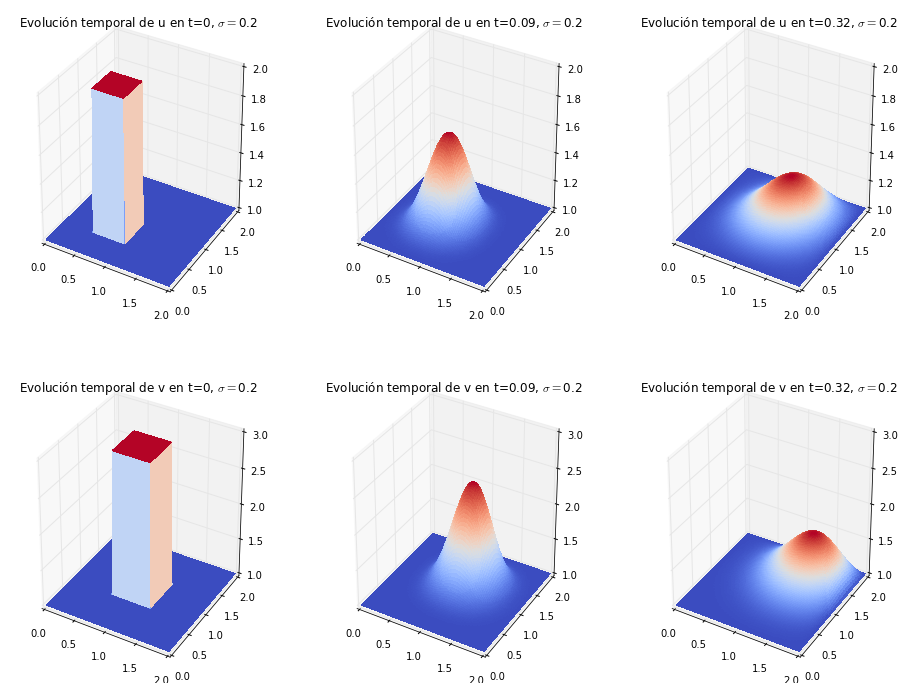

In [42]:
L = 2.

nx = 101
ny = 101
dx = L/(nx-1.)
dy = L/(ny-1.)

x = linspace(0,L,nx)
y = linspace(0,L,ny)
                  
fig = figure(figsize=(16, 12), dpi=200)
ax = fig.add_subplot(231, projection='3d')
bx = fig.add_subplot(232, projection='3d')
cx = fig.add_subplot(233, projection='3d')
ex = fig.add_subplot(234, projection='3d')
fx = fig.add_subplot(235, projection='3d')
gx = fig.add_subplot(236, projection='3d')
X, Y = meshgrid(x, y)  

u = ones((ny,nx))
u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

v= ones((ny,nx))
v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3

sigma = 0.2

ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ex.plot_surface(X, Y, v[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

U1, V1, t1 = avance_en_tiempo(250, nx, ny, dx, dy, sigma)
bx.plot_surface(X, Y, U1[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
fx.plot_surface(X, Y, V1[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

U2,V2,t2 = avance_en_tiempo(800, nx, ny, dx, dy, sigma)
cx.plot_surface(X, Y, U2[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
gx.plot_surface(X, Y, V2[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(1.,2.)
bx.set_zlim(1.,2.)
cx.set_zlim(1.,2.)
ex.set_zlim(1.,3.)
fx.set_zlim(1.,3.)
gx.set_zlim(1.,3.)

ax.set_title(u"Evolución temporal de u en t=0, $\sigma = $"+str(sigma))
bx.set_title(u"Evolución temporal de u en t="+str(trunc(100*t1)/100)+", $\sigma = $"+str(sigma))
cx.set_title(u"Evolución temporal de u en t="+str(trunc(100*t2)/100)+", $\sigma = $"+str(sigma))
ex.set_title(u"Evolución temporal de v en t=0, $\sigma = $"+str(sigma))
fx.set_title(u"Evolución temporal de v en t="+str(trunc(100*t1)/100)+", $\sigma = $"+str(sigma))
gx.set_title(u"Evolución temporal de v en t="+str(trunc(100*t2)/100)+", $\sigma = $"+str(sigma))